# Python DataFrames and Basic Graphs

Python is a popular programming language that can be used for analysis and graphing of large datasets. There are a lot of __free resouces online__ to learn python:

 - https://www.codecademy.com
 - https://www.datacamp.com
 - https://docs.python.org/3.8/tutorial/index.html
 - Coursera courses such as "Programming for Everybody (Getting Started with Python)" from University of Michigan
 - Linkedin Learning courses (free with UIC login) such as "Learning Python"
 
To use this Jupyter Notebook you _do not have to download anything_, but a way to download and use Python and many of the Python packages is by downloading the __Anaconda platform__:

 - https://www.anaconda.com/distribution/


In this short walk-through we are going to focus on practical Python packages for data analysis called __Pandas__ and __Seaborn__. Packages add functionality to basic Python. Here are links to the documentation for these packages:

 - Pandas: https://pandas.pydata.org/docs/
 - Seaborn: https://seaborn.pydata.org/index.html

In __Part 1__ we will learn how to import csv files (comma-seperated values files) containing data and convert them into data frames. We'll see how to manipulate the data frames and perform summary statistics. 

In __Part 2__ we will use Seaborn to make several basic, yet exciting, graph types from the data. 


These commands will import the Python packages we are using:

In [315]:
#import numpy, a numerical python package that allows fast analysis of data in matrices
import numpy as np
#import pandas, a python package that introduces data frames and requires numpy
import pandas as pd
#import matplotlib.pyplot, a python package for making graphs
import matplotlib.pyplot as plt
#import seaborn, a python package that can make nice scientific graphs and requires matplotlib
import seaborn as sns

This next command is so that the graphs will be plotted to the right size in the notebook. It only works in Jupyter Notebooks.

In [127]:
%matplotlib inline

## Part 1: Creating the data frame and summary statistics

We are going to use a built-in dataset from the seaborn package called 'mpg' that includes data on different types of cars. This dataset can be accessed directly from seaborn, but we are going to save it to a csv (comma seperated variable) file and reopen it as a csv to demonstrate importing files with python.

In [128]:
#accessing the built-in mpg dataset and saving it as the variable 'df'
df = sns.load_dataset('mpg')

#saving 'df' as a file called 'mpg.csv'. You can also use a longer file path to save to a different location.
df.to_csv('mpg.csv',index=False)

In [386]:
#reading the 'mpg.csv' file
df = pd.read_csv('mpg.csv')

Try checking all the read_csv function options by hitting __'shift + tab'__ while you are typing inside the parenthesis!
This works for all python functions in Jupyter Notebooks.

In [387]:
#display the df
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [130]:
#selecting a specific column of the data frame
df['weight']

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

In [131]:
#selecting a specific row of the data frame
#note when using iloc that numbering starts at 0 not 1 for both rows and columns
df.iloc[396]

mpg                      28
cylinders                 4
displacement            120
horsepower               79
weight                 2625
acceleration           18.6
model_year               82
origin                  usa
name            ford ranger
Name: 396, dtype: object

Note that the index is just a list of numbers, and it would be more useful to use the column "name" as the index. You can change the index as follows:

In [388]:
#making one of the columns into the index of the dataframe 
df.index=df['name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage


Now we can select rows by name of vehicle:

In [133]:
#selcting a specific row by name
df.loc['buick skylark 320']
#note the method is loc, not iloc now

mpg                            15
cylinders                       8
displacement                  350
horsepower                    165
weight                       3693
acceleration                 11.5
model_year                     70
origin                        usa
name            buick skylark 320
Name: buick skylark 320, dtype: object

The old 'names' column is repetitive now and we can delete it. We can also delete specific rows!

In [389]:
#deleting a column
df.drop('name', axis=1)

#deleting a row
df.drop('buick skylark 320', axis=0)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage


New columns can be added to the dataframe as well. For example, if you wanted a normalized version of one of the column variables you could create a new column using mathematical operations on columns:

In [390]:
#creating a new column
df['normalized displacement'] = (df['displacement'] - df['displacement'].mean()) / df['displacement'].std() * 100

Now lets look at some info about the data frame:

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 10 columns):
mpg                        398 non-null float64
cylinders                  398 non-null int64
displacement               398 non-null float64
horsepower                 392 non-null float64
weight                     398 non-null int64
acceleration               398 non-null float64
model_year                 398 non-null int64
origin                     398 non-null object
name                       398 non-null object
normalized displacement    398 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 44.2+ KB


Note that the data types (dtypes) include float64, int64 and object. These were automatically interpreted by pandas when you loaded in the csv file! Numbers with decimals are dtype float64, numbers that are integers are dtype int64, and strings are stored as objects. 

Also note that there are 6 null values in the 'horsepower' column, meaning some data is missing. 

In [391]:
#removing rows with missing data
df.dropna(inplace=True)

You can change the dtype of any column, although sometimes you will run into errors if there are still missing values. The dtyle 'category' is more versatile than 'object' for categorical variables when it comes to graphing.

In [392]:
#change to category dtype
df['cylinders'] = df['cylinders'].astype('category')
df['orgin'] = df['origin'].astype('category')

#change to integer dtype (will round decimals)
df['displacement'] = df['displacement'].astype('int64')

To see the summary statistics for each numerical column you can use the describe method:

In [393]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration,model_year,normalized displacement
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.410714,104.469388,2977.584184,15.541327,75.979592,0.945729
std,7.805007,104.645191,38.491160,849.402560,2.758864,3.683737,100.358844
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,-120.289704
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,-84.804850
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,76.000000,-40.688544
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,78.952957
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000,250.862690


You can also calculate summary statistics by group for categorical variables!

In [394]:
#creating the groups based off a categorical column
by_origin = df.groupby('origin')

#you can use any built-in statistics function on the groups
by_origin.mean()


,mpg,displacement,horsepower,weight,acceleration,model_year,normalized displacement
origin,,,,,,,
europe,27.602941,109.632353,80.558824,2433.470588,16.794118,75.676471,-80.362191
japan,30.450633,102.708861,79.835443,2221.227848,16.172152,77.443038,-87.002167
usa,20.033469,247.510204,119.048980,3372.489796,14.990204,75.591837,51.871535


Some other useful data representations are correlation tables and pivot tables:

In [276]:
#creating a correlation matrix for the numerical variables
df.corr()

,mpg,displacement,horsepower,weight,acceleration,model_year,normalized displacement
mpg,1.000000,-0.805120,-0.778427,-0.832244,0.423329,0.580541,-0.805127
displacement,-0.805120,1.000000,0.897255,0.932996,-0.543801,-0.369838,1.000000
horsepower,-0.778427,0.897255,1.000000,0.864538,-0.689196,-0.416361,0.897257
weight,-0.832244,0.932996,0.864538,1.000000,-0.416839,-0.309120,0.932994
acceleration,0.423329,-0.543801,-0.689196,-0.416839,1.000000,0.290316,-0.543800
model_year,0.580541,-0.369838,-0.416361,-0.309120,0.290316,1.000000,-0.369855
normalized displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.369855,1.000000


In [278]:
df.pivot_table(index="origin",columns="model_year",values="mpg")

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.750000,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,36.8375,30.600000,40.000000
japan,25.500000,29.500000,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.4000,32.958333,34.888889
usa,15.272727,17.736842,16.277778,15.034483,18.142857,17.55,19.431818,20.722222,21.772727,23.478261,26.3000,27.530769,29.789474


## Part 2:

### Graphing with Seaborn


First we can set some basic plot style parameters with sns.set

If you ever want to know more about what the options in a function are you can check it's documentation page by searching online, or you can hit 'shift + tab' when you are typing inside it's parenthesis in Jupyter notebook!

In [395]:
sns.set(context='notebook', style='ticks', palette='muted', font='sans-serif', font_scale=1.5)

#### Bar Plots

These are good to use when plotting categorical data and continous data.

The default error bars is 95% confidence interval (bootstrapped) in Seaborn. 

You can change this by setting the option ci=90 for 90% confidence interval, or ci='sd' for standard deviation

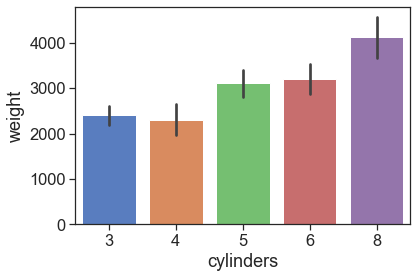

In [396]:
sns.barplot(x='cylinders', y="weight",ci='sd',data=df)

Changing the x and y variables can makes the plot horizontal instead of vertical.

You can also adjust the order of the bars using the order option, and passing it a list of the categories in the order you want.

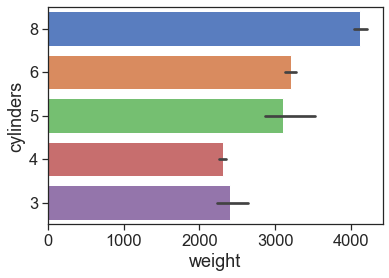

In [397]:
sns.barplot(x='weight', y='cylinders', data=df, order=[8,6,5,4,3])

### Changing plot aesthetics

You can have a lot of control over plot aesthetics in Python, however, I found that learning how to change aesthetics was challenging, and was sometimes different for each plot type. The best way to learn is using the package documentation and also by searching for what you want online, there are lot of tutorials. 

Note that you can use commands from Matplotlib to change aesthetics in Seaborn plots too, because Seaborn is built on top of Matplotlib.

Below I show how to make some stylistic changes to bar plots:

Text(0.5, 1.0, 'Car Weight Increases with Cylinders')

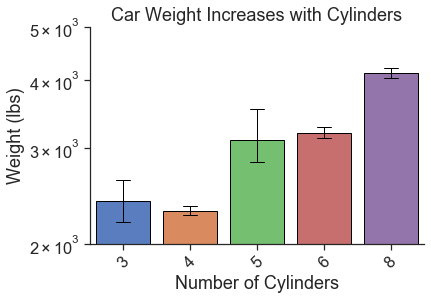

In [399]:
#changing some plot aesthetics 

#adding error bar caps, changing the error bar color and width, and adding bar edges
sns.barplot(x='cylinders', y='weight', data=df, capsize=0.2, errcolor='0', edgecolor='0',errwidth='1')
#remove the right and top edges of the plot
sns.despine()
#rotate the x-axis labels 45 degrees
plt.xticks(rotation=45)
#change y axis scale
plt.yscale("log")
#set y axis tick marks
plt.yticks([2000,3000,4000,5000])
#add labels and title
plt.xlabel("Number of Cylinders")
plt.ylabel("Weight (lbs)")
plt.title("Car Weight Increases with Cylinders")

# Box and Violin Plots

The box is the interquartile range (contains 50% of the data). The whiskers can be modified with the "whis" option, the default is whis=1.5, which is the "Proportion of the IQR past the low and high quartiles to extend the plot whiskers". I think that this means the default covers 75% of the upper quartile and lower quartile.

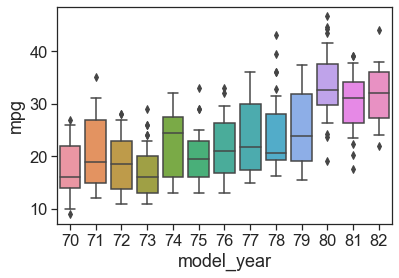

In [354]:
sns.boxplot(x='model_year',y='mpg',data=df, whis=0.5)

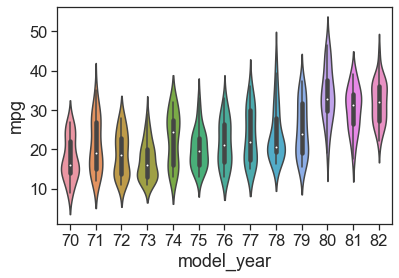

In [400]:
sns.violinplot(x='model_year',y='mpg',data=df)

### Catplot
This is one way you can add a second category variable to the plot (the 'hue' option).

By specifying 'kind' you can make a 'bar' plot or others.

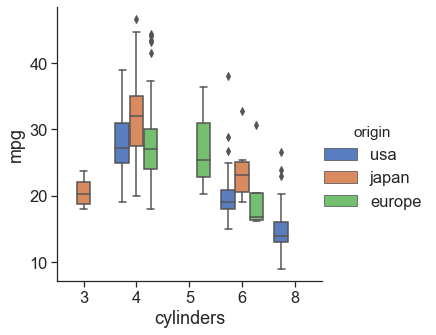

In [368]:
sns.catplot(x='cylinders', y="mpg",hue="origin",data=df, kind='box')

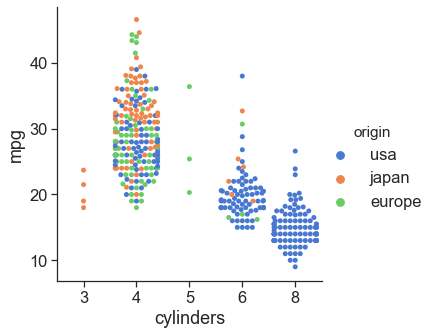

In [385]:
sns.catplot(x='cylinders', y="mpg",hue="origin",data=df, kind='swarm')

#### Distplot

Useful to check the distribution of a continous variable.

This is a histogram with a KDE (kernal density estimate) overlayed on top of it.

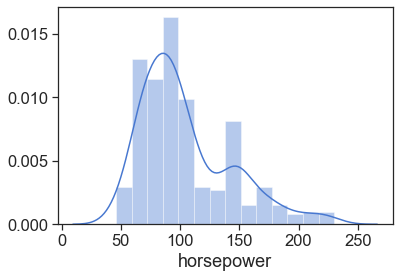

In [369]:
sns.distplot(df['horsepower'])

It is possible to change the number of bins and remove the KDE line:

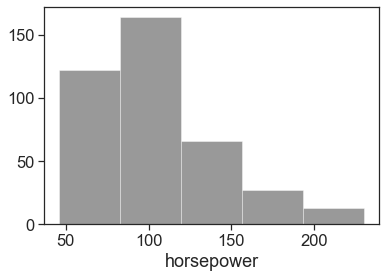

In [370]:
sns.distplot(df['horsepower'],bins=5,kde=False,color="black")

#### Lineplot

Good for plotting a continous variable against an ordered variable like 'model_year'

This automatically includes a 95% confidence interval that you can change to standard deviation using ci="sd" similarly to for barplots earlier.

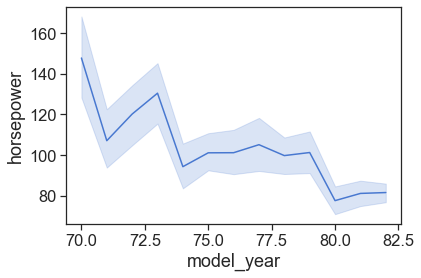

In [371]:
sns.lineplot(x="model_year",y="horsepower",data=df)

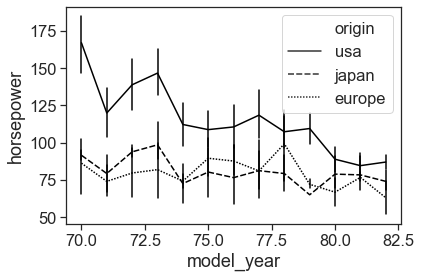

In [372]:
#style='origin' makes different style lines for each origin
#err_style='bars' converts to using bars to represent error
sns.lineplot(x="model_year",y="horsepower",style="origin",err_style="bars",color='black',data=df)

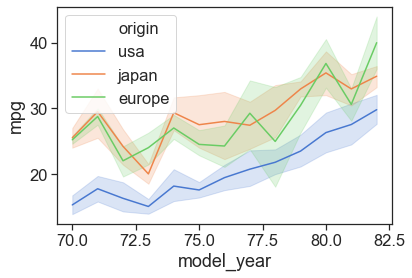

In [373]:
#hue='origin' uses a different color line for each origin
sns.lineplot(x='model_year',y='mpg',hue="origin",data=df)

#### Scatterplots

Good for plotting two continuous variables

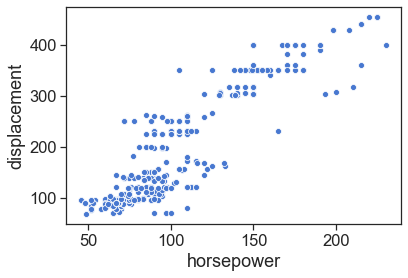

In [401]:
sns.scatterplot(x='horsepower',y='displacement',data=df)

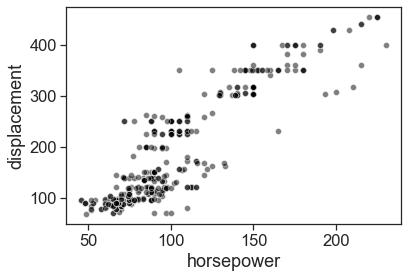

In [375]:
#the alpha option determines how transparent the dots are, so you can see where they pile up
sns.scatterplot(x='horsepower',y='displacement',data=df,alpha=0.5,color='black')

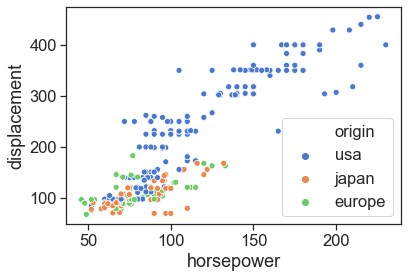

In [376]:
sns.scatterplot(x='horsepower', y="displacement",hue="origin",data=df)

#### Jointplot

Jointplot combines scatter plot and dist plot. You can change how the data is graphed using the 'kind' option. 

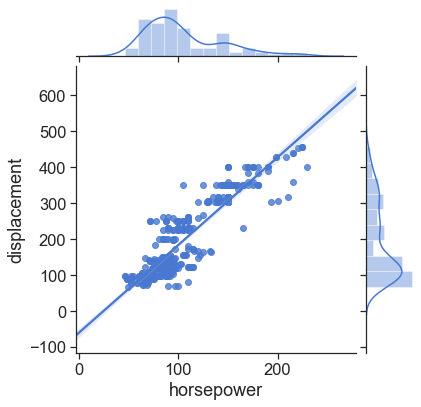

In [377]:
sns.jointplot(x='horsepower',y='displacement',data=df,kind='reg')

In [403]:
df["horsepower"].corr(df["displacement"],method="pearson")

#I couldn't figure out how to get the p-value for the correlation, if anyone knows, let me know!

0.8972545898600742

#### Heatmap plots

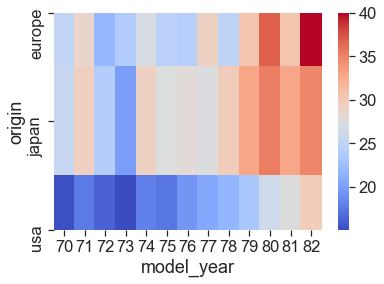

In [409]:
pt = df.pivot_table(index="origin",columns="model_year",values="mpg")
sns.heatmap(pt,cmap='coolwarm')

#### Pairplots

These are a great way to explore your data. The diagonal shows the distribution of the data for each variable, and the sides show scatterplots of variables plotted against eachother. You can use the 'hue' option to have different colors by an additional variable.

Here I used only a subset of 'df' because there were initally too many columns. I used df.iloc[:,[0,4,5,7]] to specify all the rows (:) and a list of columns ([0,4,5,7]). Remember that the numbering begins at 0 in python!

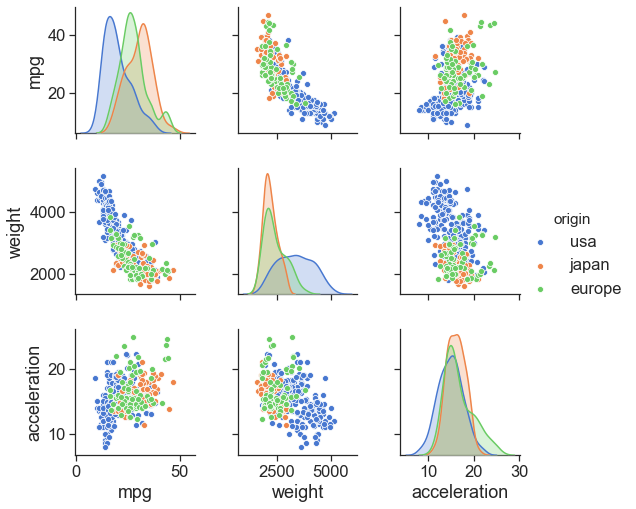

In [274]:
sns.pairplot(data=df.iloc[:,[0,4,5,7]],hue='origin')

### Saving a plot

You can save a plot as any image type just by adding .jpg, .tiff, .png, ect in the file name. The image resolution can be set using the 'dpi' option. Note that you can include a longer file path to save to a specific location, otherwise it will save to your current working directory.

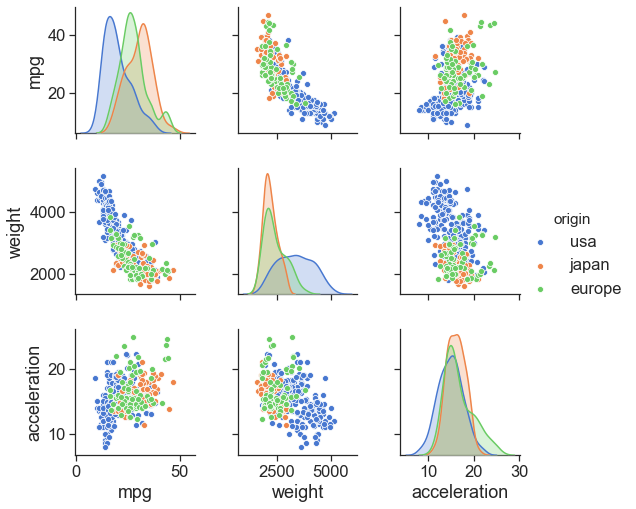

In [384]:
my_plot = sns.pairplot(data=df.iloc[:,[0,4,5,7]],hue='origin')

my_plot.savefig('my_plot.tiff', dpi=300)

If you can't find your saved plot, you can check your current working directory using the following:

In [318]:
import os

print(os.getcwd())

/Users/Bethany/Documents/Courses/RMOTR
